# VALORANT REDDIT CRAWL USING API

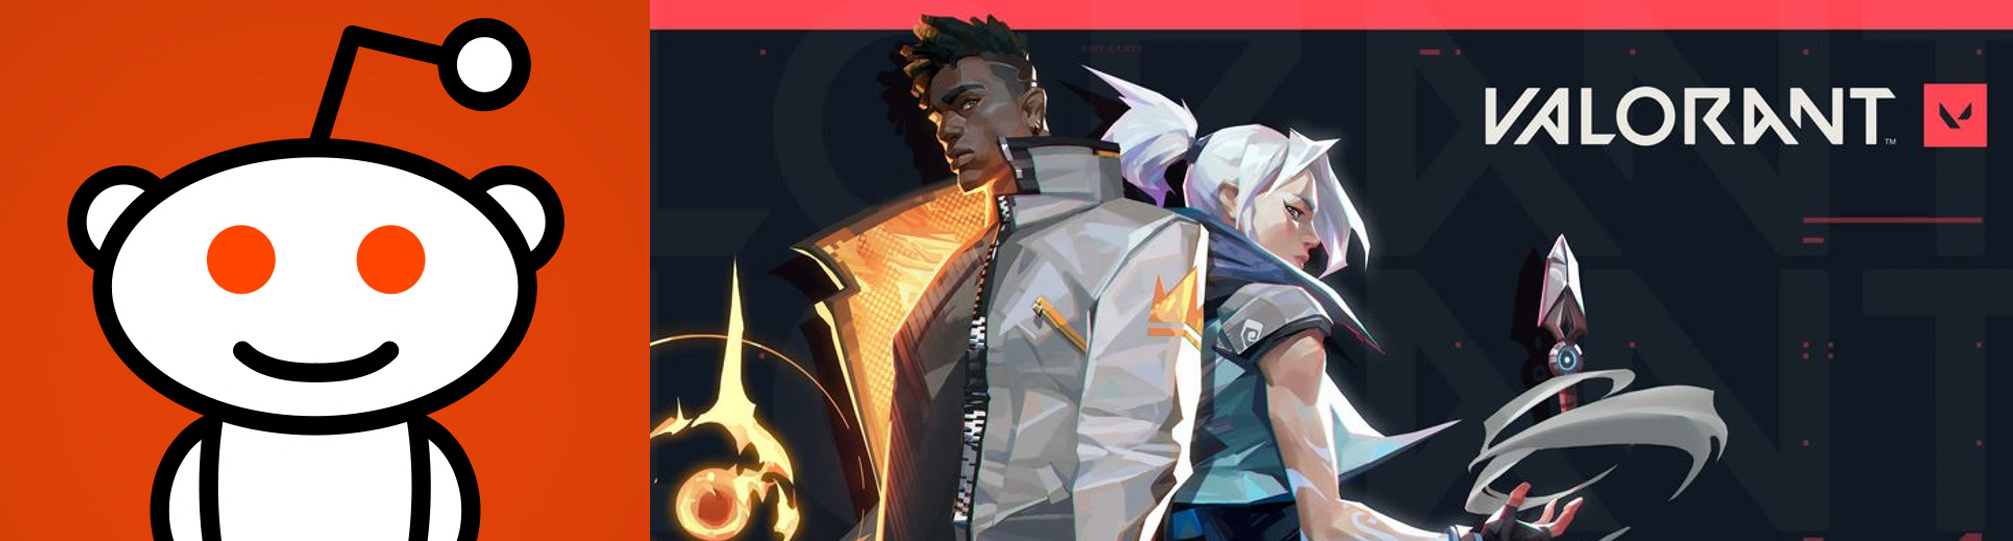

For this project, we will be doing a Reddit crawl on a newly-released online game called 'Valorant'. Using Pushshift API and simple data wrangling, we will scrape the data from the forum page and "summarize general information".

<i> Reddit is an American social news aggregation, web content rating, and discussion website. Registered members submit content to the site such as links, text posts, and images, which are then voted up or down by other members. - Wikipedia </i>

<i> Valorant is a free-to-play multiplayer tactical first-person shooter developed and published by Riot Games, for Microsoft Windows. The game was initally released on June 2, 2020. - Wikipedia</i>

## 1. Importing your packages

In [1]:
import pandas as pd 
import datetime
import csv
import os 
import requests 
import datetime as dt
import time

## 2. Choose reddit page
For this project, we will be using 'Valorant' as our search key.

In [2]:
URL = "https://api.pushshift.io/reddit/submission/search/"  #query submissions
PARAMS = {
    'after': 1594339201, #get dates after July 10, 2020 when the game was released
    'before': 1597017600, #get dates before August 10, 2020
    'sort_type': 'score', # sort by score
    'sort': 'desc', # sort in descending order
    'subreddit': 'valorant', # do a search on valorant subreddit
    'size': 30, # give only 30 search results
}

#use the requests library to query pushshift api
r = requests.get(url = URL, params=PARAMS)
#parse returned data to a json object
r.json()

{'data': [{'all_awardings': [],
   'allow_live_comments': True,
   'author': 'deepanshu18',
   'author_flair_background_color': 'transparent',
   'author_flair_css_class': None,
   'author_flair_richtext': [{'a': ':Jett:',
     'e': 'emoji',
     'u': 'https://emoji.redditmedia.com/mka0tkxgv8251_t5_2dkvmc/Jett'}],
   'author_flair_template_id': '2671da3e-7c73-11ea-8ef7-0e68171f5873',
   'author_flair_text': ':Jett:',
   'author_flair_text_color': 'dark',
   'author_flair_type': 'richtext',
   'author_fullname': 't2_zp5iy',
   'author_patreon_flair': False,
   'author_premium': False,
   'awarders': [],
   'can_mod_post': False,
   'contest_mode': False,
   'created_utc': 1595367088,
   'domain': 'v.redd.it',
   'full_link': 'https://www.reddit.com/r/VALORANT/comments/hvgcqs/new_phantom_skin_oni_phanton_in_game_with_all/',
   'gildings': {},
   'id': 'hvgcqs',
   'is_crosspostable': True,
   'is_meta': False,
   'is_original_content': False,
   'is_reddit_media_domain': True,
   'is_rob

## 3. Identify the fields to be included

It is important that you check what information will be available from the API being used. For this project, using the Pushshift API, the following fields will be included in the crawl:
- author
- subreddit
- date created 
- number of comments 
- score
- submission title 
- submission description

In [3]:
def to_utc(date):
    #This function converts an object to UTC. This is to automate the conversion 
    #of dates instead of going to https://www.unixtimeconverter.io/ 
    return int(date.replace(tzinfo=dt.timezone.utc).timestamp())
    
def to_readable_date(timestamp):
    #This function converts the UTC format to a Year-Month-Day format 
    return dt.datetime.fromtimestamp(timestamp).strftime("%Y-%m-%d")

#Declare start and end of reddit posts to extract 
start_date = dt.datetime.strptime("2020-07-10", "%Y-%m-%d")
end_date = dt.datetime.strptime("2020-08-10", "%Y-%m-%d")

#Create a range of dates to iterate 
#Note: Periods here represents the number of days it will create from the start date
date_range = (pd.date_range(
                start_date, 
                periods=(end_date - start_date).days + 2)
              .tolist())

#prepare the parameters needed to call the API
sort_type="score"
sort="desc"
fields=["author","subreddit","created_utc","num_comments","score", "title", "selftext", "id"] #column names
subreddit = 'valorant'
url = "https://api.pushshift.io/reddit/submission/search/"
results = []
#loop through the dates 
for i, s_date in enumerate(date_range):
    #prevents us from getting an index out of range error
    if i != len(date_range)-1:
        #declare end date 
        e_date = date_range[i+1]
        #call the API
        r = requests.get(url = url, params={
            'after': to_utc(s_date),
            'before': to_utc(e_date),
            'sort_type': sort_type,
            'sort': sort,
            'subreddit': subreddit,
            'fields': fields,
            "size": 500
        })

        #add logs 
        print(f"Doing {s_date.strftime('%Y-%m-%d')} to {e_date.strftime('%Y-%m-%d')}")
        if r.status_code == 200:
            results.append(r.json()['data'])
            print("=====Done")
        else:
            print("=====Skipped")
        #so that we dont get blocked from abusing the API we call it after pausing for 1 second
        time.sleep(1)

Doing 2020-07-10 to 2020-07-11
=====Done
Doing 2020-07-11 to 2020-07-12
=====Done
Doing 2020-07-12 to 2020-07-13
=====Done
Doing 2020-07-13 to 2020-07-14
=====Done
Doing 2020-07-14 to 2020-07-15
=====Done
Doing 2020-07-15 to 2020-07-16
=====Done
Doing 2020-07-16 to 2020-07-17
=====Done
Doing 2020-07-17 to 2020-07-18
=====Done
Doing 2020-07-18 to 2020-07-19
=====Done
Doing 2020-07-19 to 2020-07-20
=====Done
Doing 2020-07-20 to 2020-07-21
=====Done
Doing 2020-07-21 to 2020-07-22
=====Done
Doing 2020-07-22 to 2020-07-23
=====Done
Doing 2020-07-23 to 2020-07-24
=====Done
Doing 2020-07-24 to 2020-07-25
=====Done
Doing 2020-07-25 to 2020-07-26
=====Done
Doing 2020-07-26 to 2020-07-27
=====Done
Doing 2020-07-27 to 2020-07-28
=====Done
Doing 2020-07-28 to 2020-07-29
=====Done
Doing 2020-07-29 to 2020-07-30
=====Done
Doing 2020-07-30 to 2020-07-31
=====Done
Doing 2020-07-31 to 2020-08-01
=====Done
Doing 2020-08-01 to 2020-08-02
=====Done
Doing 2020-08-02 to 2020-08-03
=====Done
Doing 2020-08-03

In [4]:
results

[[{'author': 'Foresince',
   'created_utc': 1594416749,
   'id': 'hoxof5',
   'num_comments': 1,
   'score': 2,
   'selftext': '[https://imgur.com/a/Shcz8Cm](https://imgur.com/a/Shcz8Cm)',
   'subreddit': 'VALORANT',
   'title': '10 games, 9 of them were Split. Are they planning on implementing map selection?'},
  {'author': 'Cowboyre',
   'created_utc': 1594424064,
   'id': 'hozpxh',
   'num_comments': 30,
   'score': 2,
   'selftext': 'If every individual skin was $5 n every bundle was $20 wouldn’t a lot more people buy it? Instead of like only a few people shelling out the cash to buy a $100 dragon bundle and those $10-$20 individual skins? Worked for fortnite',
   'subreddit': 'VALORANT',
   'title': 'Wouldn’t it make more sense to make skins cheaper so more people buy them?'},
  {'author': 'kushy4K',
   'created_utc': 1594423838,
   'id': 'hoznu5',
   'num_comments': 0,
   'score': 2,
   'selftext': '[https://clips.twitch.tv/VictoriousImpartialFalconDatSheffy](https://clips.twitch

## 4. Save to pandas dataframe

After crawling, save the results to a pandas dataframe for exploratory data analysis (EDA).

In [5]:
flat_list = []

for sublist in results:
    if sublist is not None:
        for item in sublist:
            flat_list.append(item)

df = pd.DataFrame.from_dict(flat_list)
display(df.head())
df.to_csv("reddit_valorant.csv")

,author,created_utc,id,num_comments,score,selftext,subreddit,title
0,Foresince,1594416749,hoxof5,1,2,[https://imgur.com/a/Shcz8Cm](https://imgur.co...,VALORANT,"10 games, 9 of them were Split. Are they plann..."
1,Cowboyre,1594424064,hozpxh,30,2,If every individual skin was $5 n every bundle...,VALORANT,Wouldn’t it make more sense to make skins chea...
2,kushy4K,1594423838,hoznu5,0,2,[https://clips.twitch.tv/VictoriousImpartialFa...,VALORANT,wardell fast ace
3,Razardor,1594422096,hoz71e,0,2,Fire Rate: 6.5 -&gt; 4.5 \n\n\nWall Pen: Medi...,VALORANT,Guardian Info not updated (yet)
4,thedoctorg20,1594392125,hoq4jd,5,2,If the point of skins is to enable players to ...,VALORANT,Suggestion: Rotating Store offers should exclu...


In [6]:
df = pd.read_csv('C:/Users/ACER/Desktop/DLSU/Module_1_Data_Collection/Module_1/reddit_valorant.csv')

In [7]:
df.describe()

,Unnamed: 0,created_utc,num_comments,score
count,3200.000000,3.200000e+03,3200.000000,3200.000000
mean,1599.500000,1.595720e+09,23.870625,77.335313
std,923.904757,7.934494e+05,111.997910,623.048528
min,0.000000,1.594342e+09,0.000000,1.000000
25%,799.750000,1.595073e+09,1.000000,1.000000
50%,1599.500000,1.595716e+09,2.000000,1.000000
75%,2399.250000,1.596395e+09,10.000000,5.000000
max,3199.000000,1.597065e+09,2454.000000,14576.000000


## 5. Basic EDA (Exploratory Data Analysis)

In coding, we have different ways of populating the same information. Shown below are different ways of working around your data.

Let's try to answer below questions based on the information we were able to crawl and save:
- How many submissions were you able to gather? 
- Who has the most submissions? 
- Which submission has the highest score? 
- Which submission has the highest number of comments?
- Which day of the week has the most submissions? 

In [8]:
# Question 1 How many submissions were you able to gather?

df.count()

Unnamed: 0      3200
author          3200
created_utc     3200
id              3200
num_comments    3200
score           3200
selftext        2150
subreddit       3200
title           3200
dtype: int64

In [9]:
len(df)

3200

In [10]:
# Question 2 Who has the most submissions?

df['author'].value_counts(sort=True).head(2)

[deleted]    46
Darkoplax     9
Name: author, dtype: int64

In [11]:
df['author'].value_counts().max()

46

In [12]:
# Question 3 Which submission has the highest score?
scoresubmissions = df[['title', 'id', 'score']]
print(scoresubmissions[scoresubmissions['score']==scoresubmissions['score'].max()])

                                                  title      id  score
1100  New Phantom Skin 'ONI PHANTON' in game with al...  hvgcqs  14576


In [13]:
df.nlargest(1, 'score')

,Unnamed: 0,author,created_utc,id,num_comments,score,selftext,subreddit,title
1100,1100,deepanshu18,1595367088,hvgcqs,2212,14576,NaN,VALORANT,New Phantom Skin 'ONI PHANTON' in game with al...


In [14]:
# Question 4 Which submission has the highest number of comments?

commentsubmission = df[['id', 'num_comments']]
print(commentsubmission[commentsubmission['num_comments']==commentsubmission['num_comments'].max()])

          id  num_comments
1101  hv72ne          2454


In [15]:
df.nlargest(1, 'num_comments')

,Unnamed: 0,author,created_utc,id,num_comments,score,selftext,subreddit,title
1101,1101,VoltexRB,1595337052,hv72ne,2454,5270,NaN,VALORANT,VALORANT Patch Notes 1.04


In [16]:
# Question 5 Which day of the week has the most submissions?

# code guide: Epoch Timestamps: https://pandas-docs.github.io/pandas-docs-travis/user_guide/timeseries.html
# code guide: Day of Week: https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date

# Convert your UTC to date and time first
df['timeStamp'] = pd.to_datetime(df['created_utc'], unit='s')
print(df['timeStamp'])

0      2020-07-10 21:32:29
1      2020-07-10 23:34:24
2      2020-07-10 23:30:38
3      2020-07-10 23:01:36
4      2020-07-10 14:42:05
               ...        
3195   2020-08-10 09:24:16
3196   2020-08-10 09:25:34
3197   2020-08-10 03:22:56
3198   2020-08-10 03:36:06
3199   2020-08-10 04:26:19
Name: timeStamp, Length: 3200, dtype: datetime64[ns]


In [17]:
df['day_of_week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['day_of_week'].value_counts(sort=True)

5    500
6    500
4    500
0    500
3    400
1    400
2    400
Name: day_of_week, dtype: int64

In [18]:
# code guide: Day int to Calendar day: https://stackoverflow.com/questions/36341484/get-day-name-from-weekday-int

import calendar
calendar.day_name[5]

'Saturday'

In [19]:
df['day_of_week_2'] = df['timeStamp'].dt.day_name()
df['day_of_week_2']

0       Friday
1       Friday
2       Friday
3       Friday
4       Friday
         ...  
3195    Monday
3196    Monday
3197    Monday
3198    Monday
3199    Monday
Name: day_of_week_2, Length: 3200, dtype: object

In [20]:
df['day_of_week_2'].value_counts(sort=True)

Sunday       500
Friday       500
Saturday     500
Monday       500
Thursday     400
Tuesday      400
Wednesday    400
Name: day_of_week_2, dtype: int64